In [1]:

import os
import shutil
import random
import imageio
from itertools import chain

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook, tnrange
from IPython.display import HTML

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.optimizers import *
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator

In [2]:
directorio_base = 'C:/Users/juanm/IA_II/proyecto/Datos_Filtrados/'
directorio_final= 'C:/Users/juanm/IA_II/proyecto/Datos_Generados/'
def obtener_nombres_carpetas(ruta):
    nombres = []
    carpetas = [nombre for nombre in os.listdir(ruta) if os.path.isdir(os.path.join(ruta, nombre))]
    nombres.extend(carpetas)
    return nombres

# Obtener los nombres de las carpetas en la ruta proporcionada
nombres = obtener_nombres_carpetas(directorio_final)
nombres

['Familia_Amanita',
 'Familia_Boletus',
 'Familia_Cladonia',
 'Familia_Coprinellus',
 'Familia_Daedaleopsis',
 'Familia_Ervenia',
 'Familia_Formitopsis',
 'Familia_Gyromitra',
 'Familia_Hypholoma',
 'Familia_Lactarius',
 'Familia_Leccinum',
 'Familia_Peltigera',
 'Familia_Phellinus',
 'Familia_Pholiota',
 'Familia_Suillus',
 'Familia_Trametes']

In [3]:
#@title Guardar imágenes en listas con  Padding

directorio = directorio_final
#directorio = directorio_base

imagenes = []
etiquetas = []

# Relleno deseado
padding_size = 1

for nombre in nombres:

    directorio_actual = os.path.join(directorio, nombre)
    cont = 0

    for archivo in os.listdir(directorio_actual):
        
        if archivo.endswith(".jpg"):
            
            ruta_imagen = os.path.join(directorio_actual, archivo)
            imagen = cv2.imread(ruta_imagen)

            # Redimensiona la imagen a 100x100 píxeles
            imagen_redimensionada = cv2.resize(imagen, (100, 100))

            # Agrega relleno a la imagen
            imagen_con_relleno = cv2.copyMakeBorder(imagen_redimensionada, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_CONSTANT)

            # Agrega la imagen y la etiqueta a las listas
            imagenes.append(imagen_con_relleno)
            etiquetas.append(nombres.index(nombre))  # Usa el índice del nombre como etiqueta
            cont = cont + 1


    print(f"Nombre: {nombre}, Número de imágenes: {cont}, Número de etiquetas: {cont}")
print(f"Total de imagenes de prueba: {len(imagenes)}")


Nombre: Familia_Amanita, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Boletus, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Cladonia, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Coprinellus, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Daedaleopsis, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Ervenia, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Formitopsis, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Gyromitra, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Hypholoma, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Lactarius, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Leccinum, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Peltigera, Número de imágenes: 1000, Número de etiquetas: 1000
Nombre: Familia_Phellinus, Número de imágenes: 1000, 

In [4]:
#@title Preparar imágenes

imagenes_copia = imagenes
etiquetas_copia = etiquetas

# Convierte las listas a arrays numpy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Divide el conjunto de datos en entrenamiento y validación
x_train, x_test, y_train, y_test = train_test_split(
    imagenes, etiquetas, test_size=0.3, random_state=42
)


In [5]:
#@title Normalizar datos

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convierte las etiquetas a formato one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=16)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=16)


print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('')
print('Number of images in x_train', x_train.shape[0])
print('Number of images in y_train', y_train.shape)
print('')
print('Number of images in x_test', x_test.shape[0])
print('Number of images in y_test',  y_test.shape)

x_train shape: (11200, 102, 102, 3)
y_train shape: (11200, 16)

Number of images in x_train 11200
Number of images in y_train (11200, 16)

Number of images in x_test 4800
Number of images in y_test (4800, 16)


In [6]:
from keras.applications import VGG16, ResNet50, InceptionV3, MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [12]:
model_A =  tf.keras.applications.MobileNetV2(input_shape=(102,102,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 102, 102, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 51, 51, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 51, 51, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

                                                                                                  
 block_3_expand_BN (BatchNo  (None, 26, 26, 144)          576       ['block_3_expand[0][0]']      
 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 26, 26, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 27, 27, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 13, 13, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)

                                                                                                  
 block_6_depthwise (Depthwi  (None, 7, 7, 192)            1728      ['block_6_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 7, 7, 192)            768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 7, 7, 192)            0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_p

                                                                    ']                            
                                                                                                  
 block_9_project_BN (BatchN  (None, 7, 7, 64)             256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 7, 7, 64)             0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 7, 7, 384)            24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_

 block_13_expand (Conv2D)    (None, 7, 7, 576)            55296     ['block_12_add[0][0]']        
                                                                                                  
 block_13_expand_BN (BatchN  (None, 7, 7, 576)            2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 7, 7, 576)            0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 9, 9, 576)            0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
          

 block_16_expand_relu (ReLU  (None, 4, 4, 960)            0         ['block_16_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_16_depthwise (Depthw  (None, 4, 4, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 4, 4, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 4, 4, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)     

In [13]:
#@title *Combinar ambos modelos*

print("Total layers of Mobilenet: ", len(model_A.layers))

model_A.trainable =  True
#for layer in model_A.layers[:50]:
#  layer.trainable =  False

# Nuevas capas

#flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(16, activation='softmax')

#Nuevo modelo

model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])
model_B_on_A.summary()

Total layers of Mobilenet:  154
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 16)                20496     
                                                                 
Total params: 2278480 (8.69 MB)
Trainable params: 2244368 (8.56 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [14]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
earlystopper = EarlyStopping(patience=5, start_from_epoch=10, verbose=1)

checkpointer = ModelCheckpoint('model_B_on_A_1.h5', verbose=1, save_best_only=True)

history_model_B_on_A_1 = model_B_on_A.fit(x_train, y_train,
                      epochs = 15,
                      batch_size = 8,
                      callbacks=[earlystopper, checkpointer],
                      validation_data = (x_test, y_test))

Epoch 1/15
1400/1400 [==============================] - ETA: 0s - loss: 1.8760 - accuracy: 0.3998
Epoch 1: val_loss improved from inf to 3.85720, saving model to model_B_on_A_1.h5
1400/1400 [==============================] - 165s 115ms/step - loss: 1.8760 - accuracy: 0.3998 - val_loss: 3.8572 - val_accuracy: 0.2190
Epoch 2/15


C:\Users\juanm\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1400/1400 [==============================] - ETA: 0s - loss: 1.2440 - accuracy: 0.5984
Epoch 2: val_loss improved from 3.85720 to 2.29303, saving model to model_B_on_A_1.h5
1400/1400 [==============================] - 161s 115ms/step - loss: 1.2440 - accuracy: 0.5984 - val_loss: 2.2930 - val_accuracy: 0.4129
Epoch 3/15
1400/1400 [==============================] - ETA: 0s - loss: 0.9747 - accuracy: 0.6761
Epoch 3: val_loss improved from 2.29303 to 1.69978, saving model to model_B_on_A_1.h5
1400/1400 [==============================] - 161s 115ms/step - loss: 0.9747 - accuracy: 0.6761 - val_loss: 1.6998 - val_accuracy: 0.5308
Epoch 4/15
1400/1400 [==============================] - ETA: 0s - loss: 0.8076 - accuracy: 0.7362
Epoch 4: val_loss improved from 1.69978 to 1.16839, saving model to model_B_on_A_1.h5
1400/1400 [==============================] - 161s 115ms/step - loss: 0.8076 - accuracy: 0.7362 - val_loss: 1.1684 - val_accuracy: 0.6367
Epoch 5/15
1400/1400 [==========================

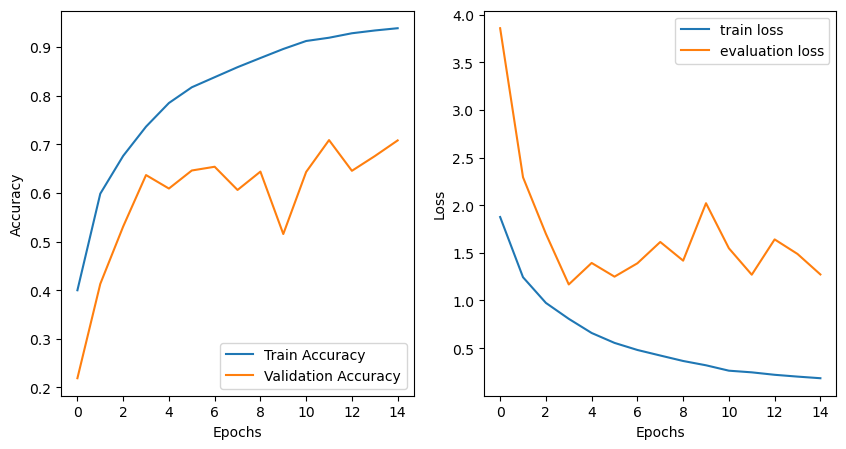

In [15]:
#@title Graficas Entrenamiento con EarlyStopping

# Plot the loss and accuracy
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_model_B_on_A_1.history['accuracy'], label='Train Accuracy');
ax.plot(history_model_B_on_A_1.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_model_B_on_A_1.history['loss'], label='train loss');
ax.plot(history_model_B_on_A_1.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [7]:
model_A =  tf.keras.applications.VGG16(input_shape=(102,102,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 102, 102, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 102, 102, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 102, 102, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 51, 51, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 51, 51, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 51, 51, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [8]:
#@title *Combinar ambos modelos*

print("Total layers of Mobilenet: ", len(model_A.layers))

model_A.trainable =  True
#for layer in model_A.layers[:50]:
#  layer.trainable =  False

# Nuevas capas

#flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(16, activation='softmax')

#Nuevo modelo

model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])
model_B_on_A.summary()

Total layers of Mobilenet:  19
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 16)                8208      
                                                                 
Total params: 14722896 (56.16 MB)
Trainable params: 14722896 (56.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
earlystopper = EarlyStopping(patience=5, start_from_epoch=10, verbose=1)

checkpointer = ModelCheckpoint('model_B_on_A_2.h5', verbose=1, save_best_only=True)

history_model_B_on_A_1 = model_B_on_A.fit(x_train, y_train,
                      epochs = 20,
                      batch_size = 8,
                      callbacks=[earlystopper, checkpointer],
                      validation_data = (x_test, y_test))

Epoch 1/20
1400/1400 [==============================] - ETA: 0s - loss: 1.7203 - accuracy: 0.4297
Epoch 1: val_loss improved from inf to 1.29809, saving model to model_B_on_A_2.h5
1400/1400 [==============================] - 549s 392ms/step - loss: 1.7203 - accuracy: 0.4297 - val_loss: 1.2981 - val_accuracy: 0.5729
Epoch 2/20


C:\Users\juanm\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1400/1400 [==============================] - ETA: 0s - loss: 1.0933 - accuracy: 0.6347
Epoch 2: val_loss improved from 1.29809 to 1.07141, saving model to model_B_on_A_2.h5
1400/1400 [==============================] - 548s 392ms/step - loss: 1.0933 - accuracy: 0.6347 - val_loss: 1.0714 - val_accuracy: 0.6569
Epoch 3/20
1400/1400 [==============================] - ETA: 0s - loss: 0.8096 - accuracy: 0.7295
Epoch 3: val_loss improved from 1.07141 to 0.82486, saving model to model_B_on_A_2.h5
1400/1400 [==============================] - 547s 391ms/step - loss: 0.8096 - accuracy: 0.7295 - val_loss: 0.8249 - val_accuracy: 0.7344
Epoch 4/20
1400/1400 [==============================] - ETA: 0s - loss: 0.6262 - accuracy: 0.7870
Epoch 4: val_loss did not improve from 0.82486
1400/1400 [==============================] - 546s 390ms/step - loss: 0.6262 - accuracy: 0.7870 - val_loss: 0.8996 - val_accuracy: 0.7002
Epoch 5/20
1400/1400 [==============================] - ETA: 0s - loss: 0.4838 - accura

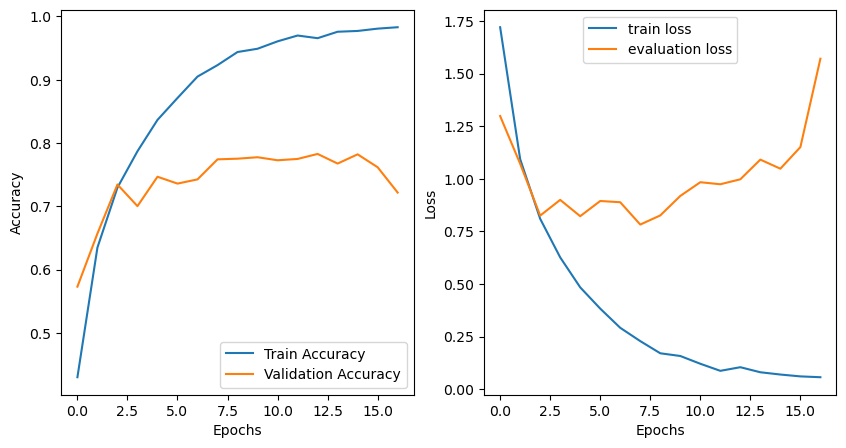

In [11]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_model_B_on_A_1.history['accuracy'], label='Train Accuracy');
ax.plot(history_model_B_on_A_1.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_model_B_on_A_1.history['loss'], label='train loss');
ax.plot(history_model_B_on_A_1.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [12]:
model_A =  tf.keras.applications.ResNet101(input_shape=(102,102,3), weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

171446536/171446536 [==============================] - 8s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 102, 102, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 108, 108, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 51, 51, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 51, 51, 64)           256       ['conv1_conv[0][0]']          
 on)                   

 conv2_block2_out (Activati  (None, 26, 26, 256)          0         ['conv2_block2_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 26, 26, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 26, 26, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 26, 26, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)   

                                                                                                  
 conv3_block2_2_relu (Activ  (None, 13, 13, 128)          0         ['conv3_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 13, 13, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 13, 13, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_blo

 ation)                                                                                           
                                                                                                  
 conv4_block1_2_conv (Conv2  (None, 7, 7, 256)            590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 7, 7, 256)            1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 7, 7, 256)            0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block3_add (Add)      (None, 7, 7, 1024)           0         ['conv4_block2_out[0][0]',    
                                                                     'conv4_block3_3_bn[0][0]']   
                                                                                                  
 conv4_block3_out (Activati  (None, 7, 7, 1024)           0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 7, 7, 256)            262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 7, 7, 256)            1024      ['conv4_block4_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv4_block6_3_conv (Conv2  (None, 7, 7, 1024)           263168    ['conv4_block6_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 7, 7, 1024)           4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 7, 7, 1024)           0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block9_2_bn (BatchNo  (None, 7, 7, 256)            1024      ['conv4_block9_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_2_relu (Activ  (None, 7, 7, 256)            0         ['conv4_block9_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block9_3_conv (Conv2  (None, 7, 7, 1024)           263168    ['conv4_block9_2_relu[0][0]'] 
 D)                                                                                               
          

 conv4_block12_1_bn (BatchN  (None, 7, 7, 256)            1024      ['conv4_block12_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block12_1_relu (Acti  (None, 7, 7, 256)            0         ['conv4_block12_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block12_2_conv (Conv  (None, 7, 7, 256)            590080    ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_2_bn (BatchN  (None, 7, 7, 256)            1024      ['conv4_block12_2_conv[0][0]']
 ormalizat

                                                                                                  
 conv4_block14_out (Activat  (None, 7, 7, 1024)           0         ['conv4_block14_add[0][0]']   
 ion)                                                                                             
                                                                                                  
 conv4_block15_1_conv (Conv  (None, 7, 7, 256)            262400    ['conv4_block14_out[0][0]']   
 2D)                                                                                              
                                                                                                  
 conv4_block15_1_bn (BatchN  (None, 7, 7, 256)            1024      ['conv4_block15_1_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 2D)                                                                                              
                                                                                                  
 conv4_block17_3_bn (BatchN  (None, 7, 7, 1024)           4096      ['conv4_block17_3_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block17_add (Add)     (None, 7, 7, 1024)           0         ['conv4_block16_out[0][0]',   
                                                                     'conv4_block17_3_bn[0][0]']  
                                                                                                  
 conv4_block17_out (Activat  (None, 7, 7, 1024)           0         ['conv4_block17_add[0][0]']   
 ion)                                                                                             
          

 conv4_block20_2_bn (BatchN  (None, 7, 7, 256)            1024      ['conv4_block20_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block20_2_relu (Acti  (None, 7, 7, 256)            0         ['conv4_block20_2_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block20_3_conv (Conv  (None, 7, 7, 1024)           263168    ['conv4_block20_2_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_3_bn (BatchN  (None, 7, 7, 1024)           4096      ['conv4_block20_3_conv[0][0]']
 ormalizat

                                                                                                  
 conv4_block23_1_relu (Acti  (None, 7, 7, 256)            0         ['conv4_block23_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block23_2_conv (Conv  (None, 7, 7, 256)            590080    ['conv4_block23_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block23_2_bn (BatchN  (None, 7, 7, 256)            1024      ['conv4_block23_2_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 rmalization)                                                                                     
                                                                                                  
 conv5_block2_add (Add)      (None, 4, 4, 2048)           0         ['conv5_block1_out[0][0]',    
                                                                     'conv5_block2_3_bn[0][0]']   
                                                                                                  
 conv5_block2_out (Activati  (None, 4, 4, 2048)           0         ['conv5_block2_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv5_block3_1_conv (Conv2  (None, 4, 4, 512)            1049088   ['conv5_block2_out[0][0]']    
 D)                                                                                               
          

In [13]:
#@title *Combinar ambos modelos*

print("Total layers of Mobilenet: ", len(model_A.layers))

model_A.trainable =  True
#for layer in model_A.layers[:50]:
#  layer.trainable =  False

# Nuevas capas

#flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(16, activation='softmax')

#Nuevo modelo

model_B_on_A = tf.keras.Sequential([
  model_A,
  global_average_layer,
  prediction_layer
])
model_B_on_A.summary()

Total layers of Mobilenet:  345
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 4, 4, 2048)        42658176  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 16)                32784     
                                                                 
Total params: 42690960 (162.85 MB)
Trainable params: 42585616 (162.45 MB)
Non-trainable params: 105344 (411.50 KB)
_________________________________________________________________


In [14]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
earlystopper = EarlyStopping(patience=5, start_from_epoch=10, verbose=1)

checkpointer = ModelCheckpoint('model_B_on_A_3.h5', verbose=1, save_best_only=True)

history_model_B_on_A_3 = model_B_on_A.fit(x_train, y_train,
                      epochs = 20,
                      batch_size = 8,
                      callbacks=[earlystopper, checkpointer],
                      validation_data = (x_test, y_test))

Epoch 1/20
1400/1400 [==============================] - ETA: 0s - loss: 1.4963 - accuracy: 0.5253
Epoch 1: val_loss improved from inf to 1.38682, saving model to model_B_on_A_3.h5
1400/1400 [==============================] - 919s 651ms/step - loss: 1.4963 - accuracy: 0.5253 - val_loss: 1.3868 - val_accuracy: 0.5877
Epoch 2/20
1400/1400 [==============================] - ETA: 0s - loss: 0.6722 - accuracy: 0.7819
Epoch 2: val_loss improved from 1.38682 to 1.28421, saving model to model_B_on_A_3.h5
1400/1400 [==============================] - 908s 649ms/step - loss: 0.6722 - accuracy: 0.7819 - val_loss: 1.2842 - val_accuracy: 0.6546
Epoch 3/20
1400/1400 [==============================] - ETA: 0s - loss: 0.3355 - accuracy: 0.8877
Epoch 3: val_loss improved from 1.28421 to 1.13377, saving model to model_B_on_A_3.h5
1400/1400 [==============================] - 908s 648ms/step - loss: 0.3355 - accuracy: 0.8877 - val_loss: 1.1338 - val_accuracy: 0.7060
Epoch 4/20
1400/1400 [===================

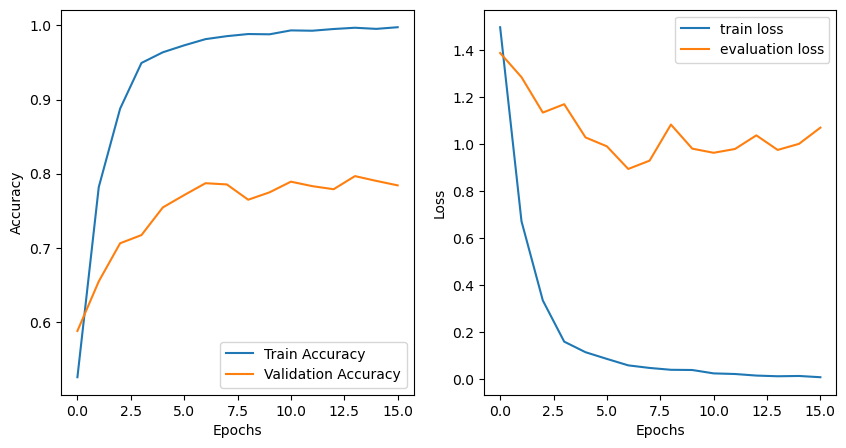

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_model_B_on_A_3.history['accuracy'], label='Train Accuracy');
ax.plot(history_model_B_on_A_3.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_model_B_on_A_3.history['loss'], label='train loss');
ax.plot(history_model_B_on_A_3.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');